In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#models
import lightgbm as lgb

from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit, train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

import time
import warnings
import gc


import datetime

pd.set_option('display.max_columns', None)
plt.style.use(style = 'seaborn')

warnings.filterwarnings('ignore')

In [ ]:
%%time
px_18 = pd.read_csv('/content/drive/MyDrive/Paycheck Project/FY18 PX Clients - Monthly Rev Buckets.csv')
px_19 = pd.read_csv('/content/drive/MyDrive/Paycheck Project/FY19 PX Clients - Monthly Rev Buckets.csv')
px_20 = pd.read_csv('/content/drive/MyDrive/Paycheck Project/FY20 PX Clients - Monthly Rev Buckets.csv')
px_21 = pd.read_csv('/content/drive/MyDrive/Paycheck Project/FY21 PX Clients - Monthly Rev Buckets.csv')
px_22 = pd.read_csv('/content/drive/MyDrive/Paycheck Project/FY22 PX Clients - Monthly Rev Buckets.csv')


CPU times: user 19.1 s, sys: 2.35 s, total: 21.4 s
Wall time: 29.3 s


In [ ]:
px_18.columns

Index(['UNIQUESYSTEMCLIENTID', 'EECOUNT', 'BUSTYPELEVEL1', 'PRSTATUS',
       'ZIPCODE', 'STATECODE', 'LENGTHOFSERVICE', 'FIRSTPRRUNDATE',
       'LASTPRRUNDATE', 'MONTHSWITHREVENUE',
       ...
       'APR18PRODUCTCOUNT', 'MAY18TOTALREV', 'MAY18PAYROLLREVENUE',
       'MAY18PEOREVENUE', 'MAY18ASOREVENUE', 'MAY18TIMEREVENUE',
       'MAY18RETIREMENTREVENUE', 'MAY18HNBREVENUE', 'MAY18WRKRSCOMPREVENUE',
       'MAY18PRODUCTCOUNT'],
      dtype='object', length=118)

TOTAL, PAYROLL, PEO, ASO, TIME, RETIREMENT, HNB, WRKRSCOMP, PRODUCTCOUNT

In [ ]:
strings = px_18.columns.tolist()
substring = "TOTALREV"

strings_with_substring = [string for string in strings if substring in string]
strings_with_substring

['JUNE17TOTALREV',
 'JULY17TOTALREV',
 'AUG17TOTALREV',
 'SEPT17TOTALREV',
 'OCT17TOTALREV',
 'NOV17TOTALREV',
 'DEC17TOTALREV',
 'JAN18TOTALREV',
 'FEB18TOTALREV',
 'MAR18TOTALREV',
 'APR18TOTALREV',
 'MAY18TOTALREV']

In [ ]:
rev = ['JUNE17TOTALREV',
 'JULY17TOTALREV',
 'AUG17TOTALREV',
 'SEPT17TOTALREV',
 'OCT17TOTALREV',
 'NOV17TOTALREV',
 'DEC17TOTALREV',
 'JAN18TOTALREV',
 'FEB18TOTALREV',
 'MAR18TOTALREV',
 'APR18TOTALREV',
 'MAY18TOTALREV']

In [ ]:
px_18.columns

Index(['UNIQUESYSTEMCLIENTID', 'EECOUNT', 'BUSTYPELEVEL1', 'PRSTATUS',
       'ZIPCODE', 'STATECODE', 'LENGTHOFSERVICE', 'FIRSTPRRUNDATE',
       'LASTPRRUNDATE', 'MONTHSWITHREVENUE',
       ...
       'APR18PRODUCTCOUNT', 'MAY18TOTALREV', 'MAY18PAYROLLREVENUE',
       'MAY18PEOREVENUE', 'MAY18ASOREVENUE', 'MAY18TIMEREVENUE',
       'MAY18RETIREMENTREVENUE', 'MAY18HNBREVENUE', 'MAY18WRKRSCOMPREVENUE',
       'MAY18PRODUCTCOUNT'],
      dtype='object', length=118)

In [ ]:
cols = ['UNIQUESYSTEMCLIENTID', 'EECOUNT', 'BUSTYPELEVEL1', 'PRSTATUS',
       'ZIPCODE', 'STATECODE', 'LENGTHOFSERVICE', 'FIRSTPRRUNDATE',
       'LASTPRRUNDATE', 'MONTHSWITHREVENUE',
        'JUNE17TOTALREV',
        'JULY17TOTALREV',
        'AUG17TOTALREV',
        'SEPT17TOTALREV',
        'OCT17TOTALREV',
        'NOV17TOTALREV',
        'DEC17TOTALREV',
        'JAN18TOTALREV',
        'FEB18TOTALREV',
        'MAR18TOTALREV',
        'APR18TOTALREV',
        'MAY18TOTALREV']

In [ ]:
px_18_total = px_18[cols].set_index(['UNIQUESYSTEMCLIENTID', 'EECOUNT', 'BUSTYPELEVEL1', 'PRSTATUS','ZIPCODE', 'STATECODE', 'LENGTHOFSERVICE', 'FIRSTPRRUNDATE','LASTPRRUNDATE', 'MONTHSWITHREVENUE']).rename_axis(['Month'], axis=1).stack().reset_index().rename(columns={0: 'TOTALREV'})

In [ ]:
px_18_total["Month"].replace({
                        "JUNE17TOTALREV": "2017-06",
                        "JULY17TOTALREV": "2017-07",
                        "AUG17TOTALREV": "2017-08",
                        "SEPT17TOTALREV": "2017-09",
                        "OCT17TOTALREV": "2017-10",
                        "NOV17TOTALREV": "2017-11",
                        "DEC17TOTALREV": "2017-12",
                        "JAN18TOTALREV": "2018-01",
                        "FEB18TOTALREV": "2018-02",
                        "MAR18TOTALREV": "2018-03",
                        "APR18TOTALREV": "2018-04",
                        "MAY18TOTALREV": "2018-05"}, inplace=True)

In [ ]:
px_18_total["Month"] = pd.to_datetime(px_18_total["Month"])

px_19

In [ ]:
strings = px_19.columns.tolist()
substring = "TOTALREV"

strings_with_substring = [string for string in strings if substring in string]
strings_with_substring

['JUNE18TOTALREV',
 'JULY18TOTALREV',
 'AUG18TOTALREV',
 'SEPT18TOTALREV',
 'OCT18TOTALREV',
 'NOV18TOTALREV',
 'DEC18TOTALREV',
 'JAN19TOTALREV',
 'FEB19TOTALREV',
 'MAR19TOTALREV',
 'APR19TOTALREV',
 'MAY19TOTALREV']

In [ ]:
cols_19 = ['UNIQUESYSTEMCLIENTID', 'EECOUNT', 'BUSTYPELEVEL1', 'PRSTATUS',
       'ZIPCODE', 'STATECODE', 'LENGTHOFSERVICE', 'FIRSTPRRUNDATE',
       'LASTPRRUNDATE', 'MONTHSWITHREVENUE',
        'JUNE18TOTALREV',
        'JULY18TOTALREV',
        'AUG18TOTALREV',
        'SEPT18TOTALREV',
        'OCT18TOTALREV',
        'NOV18TOTALREV',
        'DEC18TOTALREV',
        'JAN19TOTALREV',
        'FEB19TOTALREV',
        'MAR19TOTALREV',
        'APR19TOTALREV',
        'MAY19TOTALREV']

In [ ]:
px_19_total = px_19[cols_19].set_index(['UNIQUESYSTEMCLIENTID', 'EECOUNT', 'BUSTYPELEVEL1', 'PRSTATUS','ZIPCODE', 'STATECODE', 'LENGTHOFSERVICE', 'FIRSTPRRUNDATE','LASTPRRUNDATE', 'MONTHSWITHREVENUE']).rename_axis(['Month'], axis=1).stack().reset_index().rename(columns={0: 'TOTALREV'})

px_19_total.head()

,UNIQUESYSTEMCLIENTID,EECOUNT,BUSTYPELEVEL1,PRSTATUS,ZIPCODE,STATECODE,LENGTHOFSERVICE,FIRSTPRRUNDATE,LASTPRRUNDATE,MONTHSWITHREVENUE,Month,TOTALREV
0,2098,40,Public Administration,Active,12181,NY,514.9,1978-10-01,2021-09-28,12,JUNE18TOTALREV,1479.92
1,2098,40,Public Administration,Active,12181,NY,514.9,1978-10-01,2021-09-28,12,JULY18TOTALREV,1517.84
2,2098,40,Public Administration,Active,12181,NY,514.9,1978-10-01,2021-09-28,12,AUG18TOTALREV,1536.34
3,2098,40,Public Administration,Active,12181,NY,514.9,1978-10-01,2021-09-28,12,SEPT18TOTALREV,1565.82
4,2098,40,Public Administration,Active,12181,NY,514.9,1978-10-01,2021-09-28,12,OCT18TOTALREV,1879.76


In [ ]:
px_19_total["Month"].replace({
                        "JUNE18TOTALREV": "2018-06",
                        "JULY18TOTALREV": "2018-07",
                        "AUG18TOTALREV": "2018-08",
                        "SEPT18TOTALREV": "2018-09",
                        "OCT18TOTALREV": "2018-10",
                        "NOV18TOTALREV": "2018-11",
                        "DEC18TOTALREV": "2018-12",
                        "JAN19TOTALREV": "2019-01",
                        "FEB19TOTALREV": "2019-02",
                        "MAR19TOTALREV": "2019-03",
                        "APR19TOTALREV": "2019-04",
                        "MAY19TOTALREV": "2019-05"}, inplace=True)

In [ ]:
px_19_total["Month"] = pd.to_datetime(px_19_total["Month"])

px_20

In [ ]:
strings = px_20.columns.tolist()
substring = "TOTALREV"

strings_with_substring = [string for string in strings if substring in string]
strings_with_substring

['JUNE19TOTALREV',
 'JULY19TOTALREV',
 'AUG19TOTALREV',
 'SEPT19TOTALREV',
 'OCT19TOTALREV',
 'NOV19TOTALREV',
 'DEC19TOTALREV',
 'JAN20TOTALREV',
 'FEB20TOTALREV',
 'MAR20TOTALREV',
 'APR20TOTALREV',
 'MAY20TOTALREV']

In [ ]:
cols_20 = ['UNIQUESYSTEMCLIENTID', 'EECOUNT', 'BUSTYPELEVEL1', 'PRSTATUS',
       'ZIPCODE', 'STATECODE', 'LENGTHOFSERVICE', 'FIRSTPRRUNDATE',
       'LASTPRRUNDATE', 'MONTHSWITHREVENUE',
        'JUNE19TOTALREV',
        'JULY19TOTALREV',
        'AUG19TOTALREV',
        'SEPT19TOTALREV',
        'OCT19TOTALREV',
        'NOV19TOTALREV',
        'DEC19TOTALREV',
        'JAN20TOTALREV',
        'FEB20TOTALREV',
        'MAR20TOTALREV',
        'APR20TOTALREV',
        'MAY20TOTALREV']

In [ ]:
px_20_total = px_20[cols_20].set_index(['UNIQUESYSTEMCLIENTID', 'EECOUNT', 'BUSTYPELEVEL1', 'PRSTATUS','ZIPCODE', 'STATECODE', 'LENGTHOFSERVICE', 'FIRSTPRRUNDATE','LASTPRRUNDATE', 'MONTHSWITHREVENUE']).rename_axis(['Month'], axis=1).stack().reset_index().rename(columns={0: 'TOTALREV'})
px_20_total.head()

,UNIQUESYSTEMCLIENTID,EECOUNT,BUSTYPELEVEL1,PRSTATUS,ZIPCODE,STATECODE,LENGTHOFSERVICE,FIRSTPRRUNDATE,LASTPRRUNDATE,MONTHSWITHREVENUE,Month,TOTALREV
0,658,1,"Professional, Scientific, and Technical Services",Terminated/Lost,14614,NY,397.1,1987-03-01,2020-04-27,12,JUNE19TOTALREV,190.12
1,658,1,"Professional, Scientific, and Technical Services",Terminated/Lost,14614,NY,397.1,1987-03-01,2020-04-27,12,JULY19TOTALREV,190.67
2,658,1,"Professional, Scientific, and Technical Services",Terminated/Lost,14614,NY,397.1,1987-03-01,2020-04-27,12,AUG19TOTALREV,177.47
3,658,1,"Professional, Scientific, and Technical Services",Terminated/Lost,14614,NY,397.1,1987-03-01,2020-04-27,12,SEPT19TOTALREV,177.47
4,658,1,"Professional, Scientific, and Technical Services",Terminated/Lost,14614,NY,397.1,1987-03-01,2020-04-27,12,OCT19TOTALREV,279.42


In [ ]:
px_20_total["Month"].replace({"JUNE19TOTALREV": "2019-06",
                        "JULY19TOTALREV": "2019-07",
                        "AUG19TOTALREV": "2019-08",
                        "SEPT19TOTALREV": "2019-09",
                        "OCT19TOTALREV": "2019-10",
                        "NOV19TOTALREV": "2019-11",
                        "DEC19TOTALREV": "2019-12",
                        "JAN20TOTALREV": "2020-01",
                        "FEB20TOTALREV": "2020-02",
                        "MAR20TOTALREV": "2020-03",
                        "APR20TOTALREV": "2020-04",
                        "MAY20TOTALREV": "2020-05"}, inplace=True)

In [ ]:
px_20_total["Month"] = pd.to_datetime(px_20_total["Month"])

px_21

In [ ]:
strings = px_21.columns.tolist()
substring = "TOTALREV"

strings_with_substring = [string for string in strings if substring in string]
strings_with_substring

['JUNE20TOTALREV',
 'JULY20TOTALREV',
 'AUG20TOTALREV',
 'SEPT20TOTALREV',
 'OCT20TOTALREV',
 'NOV20TOTALREV',
 'DEC20TOTALREV',
 'JAN21TOTALREV',
 'FEB21TOTALREV',
 'MAR21TOTALREV',
 'APR21TOTALREV',
 'MAY21TOTALREV']

In [ ]:
cols_21 = ['UNIQUESYSTEMCLIENTID', 'EECOUNT', 'BUSTYPELEVEL1', 'PRSTATUS',
       'ZIPCODE', 'STATECODE', 'LENGTHOFSERVICE', 'FIRSTPRRUNDATE',
       'LASTPRRUNDATE', 'MONTHSWITHREVENUE',
      'JUNE20TOTALREV',
      'JULY20TOTALREV',
      'AUG20TOTALREV',
      'SEPT20TOTALREV',
      'OCT20TOTALREV',
      'NOV20TOTALREV',
      'DEC20TOTALREV',
      'JAN21TOTALREV',
      'FEB21TOTALREV',
      'MAR21TOTALREV',
      'APR21TOTALREV',
      'MAY21TOTALREV']

In [ ]:
px_21_total = px_21[cols_21].set_index(['UNIQUESYSTEMCLIENTID', 'EECOUNT', 'BUSTYPELEVEL1', 'PRSTATUS','ZIPCODE', 'STATECODE', 'LENGTHOFSERVICE', 'FIRSTPRRUNDATE','LASTPRRUNDATE', 'MONTHSWITHREVENUE']).rename_axis(['Month'], axis=1).stack().reset_index().rename(columns={0: 'TOTALREV'})
px_21_total.head()

,UNIQUESYSTEMCLIENTID,EECOUNT,BUSTYPELEVEL1,PRSTATUS,ZIPCODE,STATECODE,LENGTHOFSERVICE,FIRSTPRRUNDATE,LASTPRRUNDATE,MONTHSWITHREVENUE,Month,TOTALREV
0,1923,2,Administrative and Support and Waste Managemen...,Active,91311,CA,486.0,1981-03-01,2021-09-29,9,JULY20TOTALREV,237.82
1,1923,2,Administrative and Support and Waste Managemen...,Active,91311,CA,486.0,1981-03-01,2021-09-29,9,SEPT20TOTALREV,238.70
2,1923,2,Administrative and Support and Waste Managemen...,Active,91311,CA,486.0,1981-03-01,2021-09-29,9,OCT20TOTALREV,133.76
3,1923,2,Administrative and Support and Waste Managemen...,Active,91311,CA,486.0,1981-03-01,2021-09-29,9,DEC20TOTALREV,119.46
4,1923,2,Administrative and Support and Waste Managemen...,Active,91311,CA,486.0,1981-03-01,2021-09-29,9,JAN21TOTALREV,385.97


In [ ]:
px_21_total["Month"].replace({"JUNE20TOTALREV": "2020-06",
                        "JULY20TOTALREV": "2020-07",
                        "AUG20TOTALREV": "2020-08",
                        "SEPT20TOTALREV": "2020-09",
                        "OCT20TOTALREV": "2020-10",
                        "NOV20TOTALREV": "2020-11",
                        "DEC20TOTALREV": "2020-12",
                        "JAN21TOTALREV": "2021-01",
                        "FEB21TOTALREV": "2021-02",
                        "MAR21TOTALREV": "2021-03",
                        "APR21TOTALREV": "2021-04",
                        "MAY21TOTALREV": "2021-05"}, inplace=True)

In [ ]:
px_21_total["Month"] = pd.to_datetime(px_21_total["Month"])

px_22

In [ ]:
strings = px_22.columns.tolist()
substring = "TOTALREV"

strings_with_substring = [string for string in strings if substring in string]
strings_with_substring

['JUNE21TOTALREV',
 'JULY21TOTALREV',
 'AUG21TOTALREV',
 'SEPT21TOTALREV',
 'OCT21TOTALREV']

In [ ]:
cols_22 = ['UNIQUESYSTEMCLIENTID', 'EECOUNT', 'BUSTYPELEVEL1', 'PRSTATUS',
       'ZIPCODE', 'STATECODE', 'LENGTHOFSERVICE', 'FIRSTPRRUNDATE',
       'LASTPRRUNDATE', 'MONTHSWITHREVENUE',
        'JUNE21TOTALREV',
        'JULY21TOTALREV',
        'AUG21TOTALREV',
        'SEPT21TOTALREV',
        'OCT21TOTALREV']

In [ ]:
px_22_total = px_22[cols_22].set_index(['UNIQUESYSTEMCLIENTID', 'EECOUNT', 'BUSTYPELEVEL1', 'PRSTATUS','ZIPCODE', 'STATECODE', 'LENGTHOFSERVICE', 'FIRSTPRRUNDATE','LASTPRRUNDATE', 'MONTHSWITHREVENUE']).rename_axis(['Month'], axis=1).stack().reset_index().rename(columns={0: 'TOTALREV'})
px_22_total.head()

,UNIQUESYSTEMCLIENTID,EECOUNT,BUSTYPELEVEL1,PRSTATUS,ZIPCODE,STATECODE,LENGTHOFSERVICE,FIRSTPRRUNDATE,LASTPRRUNDATE,MONTHSWITHREVENUE,Month,TOTALREV
0,2665440,1,Administrative and Support and Waste Managemen...,Active,28801,NC,56.9,2016-12-30,2021-09-27,4,JUNE21TOTALREV,63.89
1,2665440,1,Administrative and Support and Waste Managemen...,Active,28801,NC,56.9,2016-12-30,2021-09-27,4,JULY21TOTALREV,82.59
2,2665440,1,Administrative and Support and Waste Managemen...,Active,28801,NC,56.9,2016-12-30,2021-09-27,4,AUG21TOTALREV,63.89
3,2665440,1,Administrative and Support and Waste Managemen...,Active,28801,NC,56.9,2016-12-30,2021-09-27,4,SEPT21TOTALREV,63.89
4,2212011,18,Construction,Active,27407,NC,5.1,2021-04-27,2021-09-27,4,JUNE21TOTALREV,548.76


In [ ]:
px_22_total["Month"].replace({
      'JUNE21TOTALREV': '2021-06',
      'JULY21TOTALREV': '2021-07',
      'AUG21TOTALREV': '2021-08',
      'SEPT21TOTALREV': '2021-09',
      'OCT21TOTALREV': '2021-010'}, inplace=True)

In [ ]:
px_22_total["Month"] = pd.to_datetime(px_22_total["Month"])

In [ ]:
px_total = pd.concat([px_18_total, px_19_total, px_20_total, px_21_total, px_22_total])

In [ ]:
del px_18, px_18_total, px_19, px_19_total, px_20, px_20_total, px_21, px_21_total, px_22, px_22_total

In [ ]:
gc.collect()

152

Remove "ZIPCODE" column since it have many invalid values

In [ ]:
px_total = px_total.drop(columns='ZIPCODE', axis=1)

In [ ]:
px_total.to_parquet('px_total.parquet.gzip', compression="gzip", index=False)
!cp px_total.parquet.gzip "/content/drive/MyDrive/Paycheck Project/"

In [ ]:
%%time
px_total = pd.read_parquet("/content/drive/MyDrive/Paycheck Project/px_total.parquet.gzip")

CPU times: user 13.8 s, sys: 4.1 s, total: 17.9 s
Wall time: 15.9 s


In [ ]:
px_total

,UNIQUESYSTEMCLIENTID,EECOUNT,BUSTYPELEVEL1,PRSTATUS,STATECODE,LENGTHOFSERVICE,FIRSTPRRUNDATE,LASTPRRUNDATE,MONTHSWITHREVENUE,Month,TOTALREV
0,9970,27,"Professional, Scientific, and Technical Services",Active,MA,207.9,2004-05-21,2021-09-22,12,2017-06-01,188.37
1,9970,27,"Professional, Scientific, and Technical Services",Active,MA,207.9,2004-05-21,2021-09-22,12,2017-07-01,200.47
2,9970,27,"Professional, Scientific, and Technical Services",Active,MA,207.9,2004-05-21,2021-09-22,12,2017-08-01,282.62
3,9970,27,"Professional, Scientific, and Technical Services",Active,MA,207.9,2004-05-21,2021-09-22,12,2017-09-01,195.79
4,9970,27,"Professional, Scientific, and Technical Services",Active,MA,207.9,2004-05-21,2021-09-22,12,2017-10-01,254.10
...,...,...,...,...,...,...,...,...,...,...,...
1859770,950636,7,"Professional, Scientific, and Technical Services",Active,FL,184.4,2006-05-09,2021-09-22,4,2021-09-01,503.44
1859771,1425449,93,Finance and Insurance,Active,AL,3.2,2021-06-25,2021-09-27,4,2021-06-01,2648.37
1859772,1425449,93,Finance and Insurance,Active,AL,3.2,2021-06-25,2021-09-27,4,2021-07-01,1808.31
1859773,1425449,93,Finance and Insurance,Active,AL,3.2,2021-06-25,2021-09-27,4,2021-08-01,2789.45


In [ ]:
temp = px_total.groupby(['BUSTYPELEVEL1','Month']).TOTALREV.mean() 
temp = temp.unstack(level='BUSTYPELEVEL1') # unstack the `BUSTYPELEVEL1` index, to place it as columns
temp.columns.name = 'TOTALREV' 
temp

TOTALREV,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,Educational Services,Finance and Insurance,Health Care and Social Assistance,Information,Management of Companies and Enterprises,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction",Not Specified,Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Public Administration,Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Unclassified,Utilities,Wholesale Trade
Month,,,,,,,,,,,,,,,,,,,,,,
2017-06-01,462.679285,410.314870,395.499571,415.204726,441.626996,472.372770,371.121179,440.931267,405.384392,406.039713,676.079332,529.313002,174.554000,342.694294,393.249626,458.255446,347.459574,433.492371,538.272735,446.196836,451.492775,576.159611
2017-07-01,463.952317,405.580938,384.328061,410.166867,435.575206,448.021158,365.969750,436.320805,396.691247,398.429036,670.604241,530.146551,154.100000,337.860523,387.939956,457.959694,342.133827,433.823678,534.254675,436.379335,437.908959,572.354068
2017-08-01,550.884934,491.066563,462.691379,494.486166,526.153090,530.051247,430.637920,521.576301,473.866394,472.208537,801.368482,656.820517,197.444000,398.551669,459.188719,539.151446,411.511445,514.800851,640.802979,522.159911,535.934897,678.839006
2017-09-01,450.364615,408.953829,388.995112,405.622937,433.545129,460.217816,368.398115,438.945962,399.252643,392.543737,668.639290,544.544868,172.803333,333.486406,392.417102,445.299327,343.242759,425.103660,531.611988,425.991234,448.909805,569.643174
2017-10-01,440.599408,399.041226,386.174263,380.167262,430.554499,431.981553,347.183451,429.170137,379.056880,379.642636,666.549887,514.336706,121.204667,323.709843,371.622934,428.887027,328.059866,421.331519,524.995448,394.461046,443.846465,558.182614
2017-11-01,525.397191,493.996143,467.577535,470.406162,519.084897,573.148725,459.612156,534.055640,494.845567,493.105824,814.544655,661.831567,181.891667,403.459845,479.145299,549.882721,415.969417,515.191665,640.634684,485.557485,540.405203,696.559759
2017-12-01,452.251212,422.185595,396.456304,411.645083,444.719365,492.813716,405.139047,469.870461,424.063346,419.052192,716.023776,582.316595,144.080769,346.085405,425.440828,476.441378,367.665352,447.096811,551.019019,434.043909,466.267711,614.199404
2018-01-01,826.028524,675.442832,613.237036,684.768169,657.111111,784.332562,582.965913,725.569402,626.290047,640.057544,1026.598916,799.529399,259.655714,549.954190,611.345549,770.509387,545.993548,695.786657,819.782279,647.942074,661.084780,881.132218
2018-02-01,427.852479,401.318441,385.029023,387.045454,416.940756,475.364171,377.913052,442.065930,403.340698,412.330520,679.133868,531.365113,140.740833,326.382921,394.677091,450.792786,344.641763,418.166458,523.877619,389.001747,412.047573,578.322380


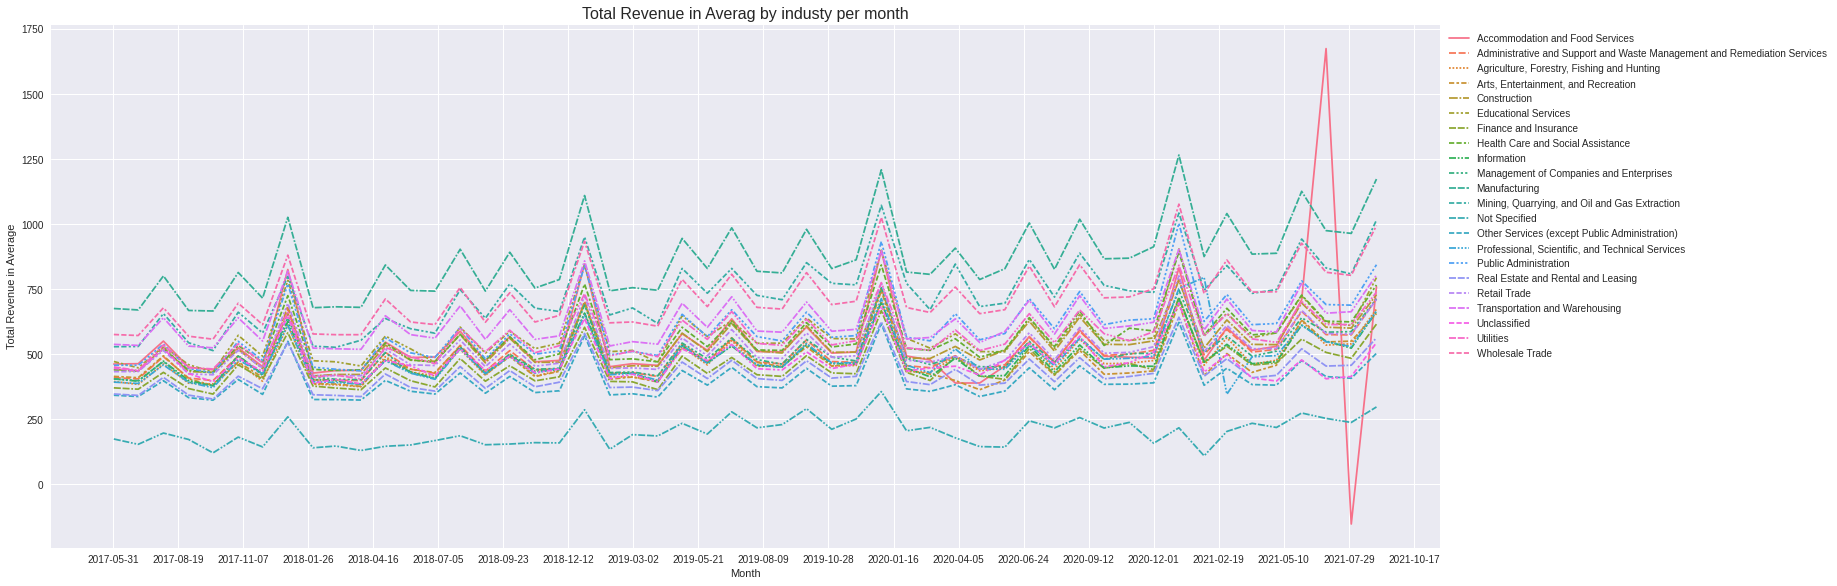

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.lineplot(data=temp)
plt.tight_layout()
plt.legend(loc = 2, bbox_to_anchor = (1,1)) # set legend apart from curve
ax.xaxis.set_major_locator(plt.MaxNLocator(24)) #reduce Xaxis values
ax.set_title("Total Revenue in Averag by industy per month", fontsize=16)
ax.set_xlabel("Month")
ax.set_ylabel("Total Revenue in Average")

plt.show()

In [ ]:
temp2 = px_total.groupby(['BUSTYPELEVEL1','Month']).TOTALREV.sum() 
temp2 = temp2.unstack(level='BUSTYPELEVEL1') # unstack the `BUSTYPELEVEL1` index, to place it as columns
temp2.columns.name = 'TOTALREV' 
# temp2 = temp2.applymap("{:,.2f}".format) # change value to currency format


In [ ]:
temp2.to_excel('temp2.xlsx', index=False)
!cp temp2.xlsx "/content/drive/MyDrive/Paycheck Project/"

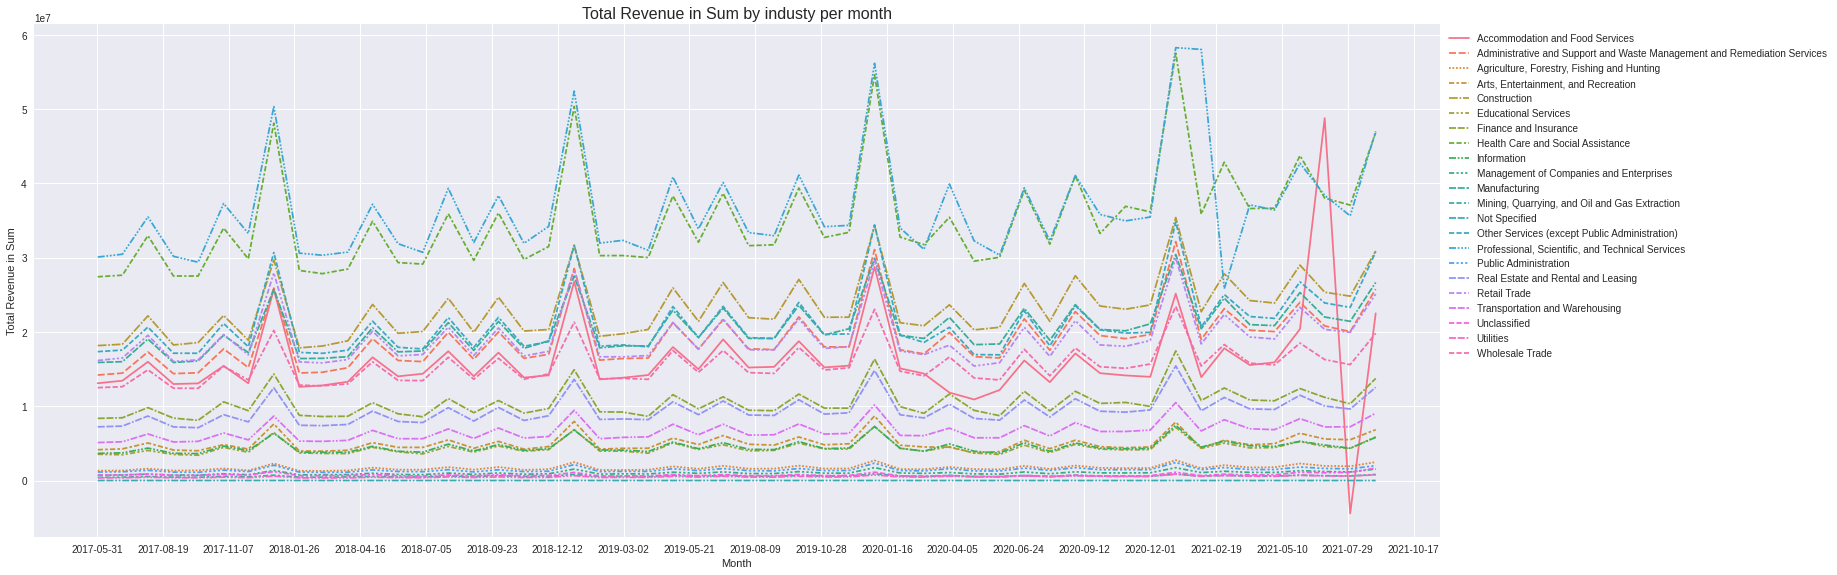

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.lineplot(data=temp2)
plt.tight_layout()
plt.legend(loc = 2, bbox_to_anchor = (1,1)) # set legend apart from curve
ax.xaxis.set_major_locator(plt.MaxNLocator(24)) #reduce Xaxis values
ax.set_title("Total Revenue in Sum by industy per month", fontsize=16)
ax.set_xlabel("Month")
ax.set_ylabel("Total Revenue in Sum")

plt.show()

In [ ]:
temp2

TOTALREV,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,Educational Services,Finance and Insurance,Health Care and Social Assistance,Information,Management of Companies and Enterprises,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction",Not Specified,Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Public Administration,Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Unclassified,Utilities,Wholesale Trade
Month,,,,,,,,,,,,,,,,,,,,,,
2017-06-01,1.309567e+07,1.420100e+07,1326110.06,4150386.44,1.816235e+07,3535710.18,8366926.98,2.742857e+07,3656161.83,736150.00,15891244.71,431919.41,2618.31,1.734924e+07,3.007966e+07,1145180.36,7229591.35,1.615539e+07,5109823.07,736224.78,369321.09,12499206.60
2017-07-01,1.343791e+07,1.445774e+07,1343995.23,4258352.41,1.834904e+07,3470819.91,8450241.52,2.763874e+07,3722550.66,739882.72,15996593.57,442672.37,2465.60,1.755929e+07,3.045988e+07,1180620.09,7326111.63,1.649831e+07,5216462.65,748390.56,366091.89,12631281.92
2017-08-01,1.598393e+07,1.730862e+07,1600449.48,5055626.56,2.216420e+07,4054892.04,9816822.03,3.296414e+07,4363361.76,858475.12,19042919.24,546474.67,2961.66,2.065374e+07,3.548610e+07,1379688.55,8680010.90,1.954853e+07,6267693.94,880883.77,441074.42,14901873.87
2017-09-01,1.298852e+07,1.439231e+07,1341644.14,4104092.88,1.825008e+07,3506859.76,8398740.22,2.753201e+07,3667135.53,735234.42,15890881.37,455239.51,2592.05,1.713887e+07,3.017962e+07,1131505.59,7219424.96,1.603704e+07,5192785.90,704163.51,368106.04,12430183.69
2017-10-01,1.307479e+07,1.450236e+07,1369760.11,4008863.78,1.856594e+07,3405742.56,8103956.11,2.752139e+07,3624541.89,725876.72,16094513.57,440272.22,1818.07,1.713040e+07,2.938348e+07,1110817.40,7109713.42,1.624359e+07,5274104.27,690306.83,374162.57,12405608.60
2017-11-01,1.542776e+07,1.772063e+07,1622026.47,4829189.66,2.221528e+07,4454511.89,10594519.81,3.398089e+07,4629280.28,909287.14,19567806.24,565865.99,2182.70,2.113161e+07,3.728134e+07,1402750.82,8863060.36,1.964786e+07,6405065.57,826418.84,451778.75,15393970.67
2017-12-01,1.309177e+07,1.520797e+07,1357862.84,4234592.97,1.888768e+07,3805014.70,9403277.28,2.983067e+07,4029025.85,778179.92,17214643.62,490892.89,1873.05,1.800959e+07,3.326011e+07,1206349.57,7895981.10,1.691635e+07,5473271.92,736138.47,387002.20,13536954.86
2018-01-01,2.573740e+07,2.590188e+07,2296572.70,7614622.04,2.967842e+07,6469174.97,14335714.77,4.809727e+07,6356843.98,1355001.82,25720409.25,717977.40,3635.18,3.068689e+07,5.033758e+07,2060342.10,12485780.46,2.795114e+07,8674936.08,1202580.49,586382.20,20205242.88
2018-02-01,1.260154e+07,1.447556e+07,1311793.88,3975730.90,1.785966e+07,3716872.45,8773629.42,2.827631e+07,3820443.09,769408.75,16420777.80,447940.79,1688.89,1.724575e+07,3.060405e+07,1135997.82,7435990.67,1.597020e+07,5311071.30,645742.90,351476.58,12839335.16


It look Some of the industries have very less impaction from COVID19 or have no significant seasonality 

In [ ]:
temp2.mean()[temp2.max() < 5000000] # choose max to filter out stable industries

TOTALREV
Agriculture, Forestry, Fishing and Hunting       1.720517e+06
Management of Companies and Enterprises          1.024685e+06
Mining, Quarrying, and Oil and Gas Extraction    5.925697e+05
Not Specified                                    1.463093e+03
Public Administration                            1.452662e+06
Unclassified                                     7.646798e+05
Utilities                                        5.094937e+05
dtype: float64

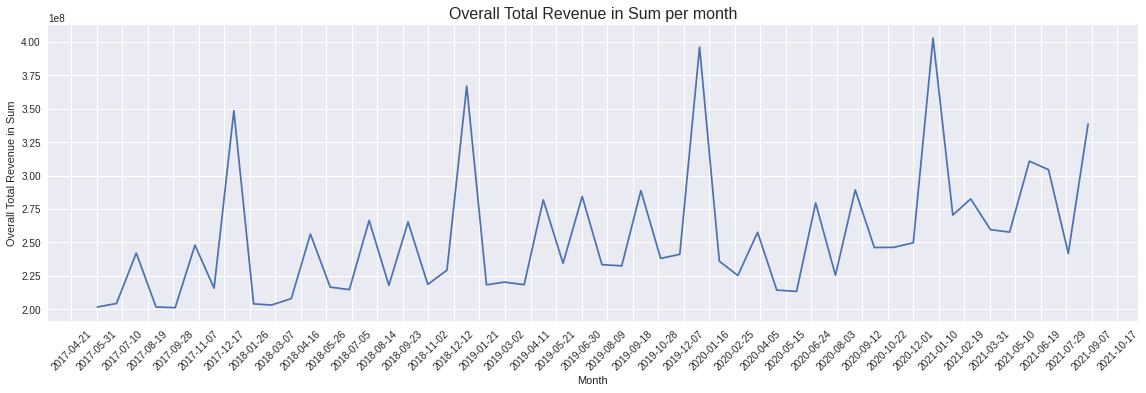

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))
ax = sns.lineplot(data=px_total.groupby(['Month']).TOTALREV.sum())
plt.tight_layout()

ax.xaxis.set_major_locator(plt.MaxNLocator(48)) #reduce Xaxis values
ax.set_title("Overall Total Revenue in Sum per month", fontsize=16)
ax.set_xlabel("Month")
ax.set_ylabel("Overall Total Revenue in Sum")

plt.xticks(rotation = 45)

plt.show()

Calculate distinct client count by month

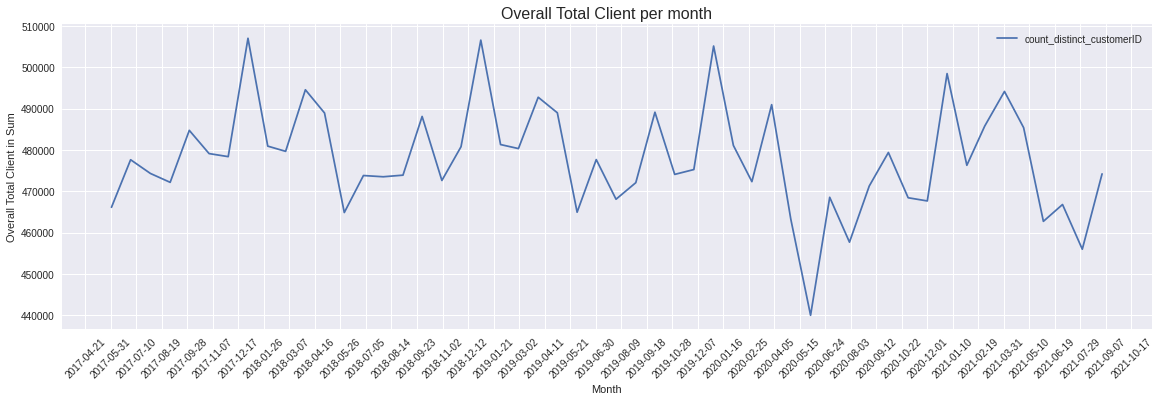

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))
# use notnull() to filter out none revenue clients 
ax = sns.lineplot(data=px_total[px_total['TOTALREV'].notnull()].groupby(['Month']).agg(count_distinct_customerID=('UNIQUESYSTEMCLIENTID', 'nunique')))
plt.tight_layout()

ax.xaxis.set_major_locator(plt.MaxNLocator(48)) #reduce Xaxis values
ax.set_title("Overall Total Client per month", fontsize=16)
ax.set_xlabel("Month")
ax.set_ylabel("Overall Total Client in Sum")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
client = pd.DataFrame(px_total[px_total['TOTALREV'].notnull()].groupby(['Month']).agg(count_distinct_customerID=('UNIQUESYSTEMCLIENTID', 'nunique')).reset_index())
client['TotalREV'] = px_total.groupby(['Month']).TOTALREV.sum().reset_index()['TOTALREV']
client ['RevPerClient'] = client['TotalREV']/client['count_distinct_customerID']

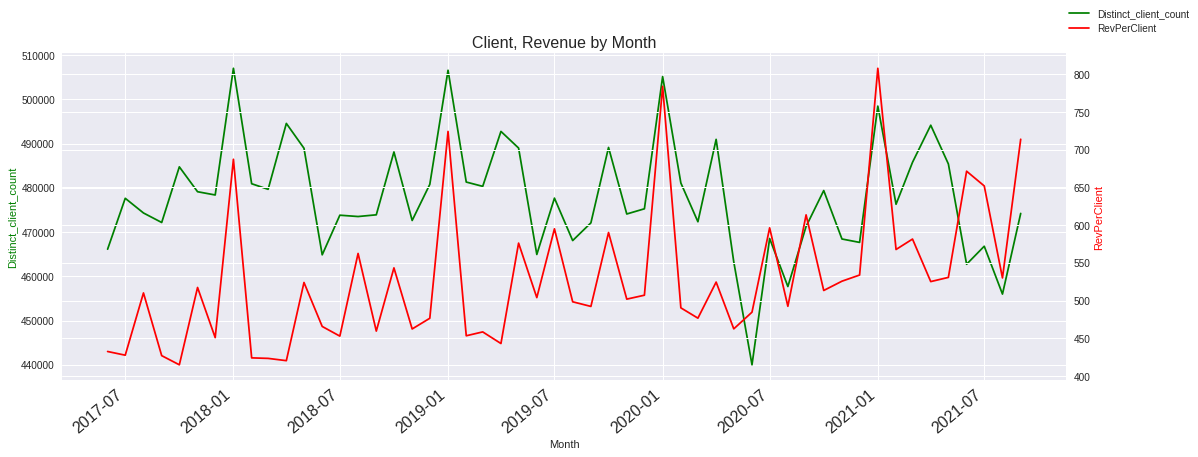

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))

ax1.set_title("Client, Revenue by Month", fontsize=16)
ax1.set_xlabel("Month")
ax1.set_ylabel("Distinct_client_count", color='g')
ax1 = sns.lineplot(x="Month", y="count_distinct_customerID", data=client, color='g')
ax1.tick_params(axis="y")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right", fontsize=16)


ax2= ax1.twinx() # set up the 2nd axis

ax2.set_ylabel("RevPerClient", color='r')
ax2 = sns.lineplot(x="Month", y="RevPerClient", data=client, color='r')
ax2.tick_params(axis="y")

ax1.figure.legend(["Distinct_client_count","RevPerClient"])
plt.show()

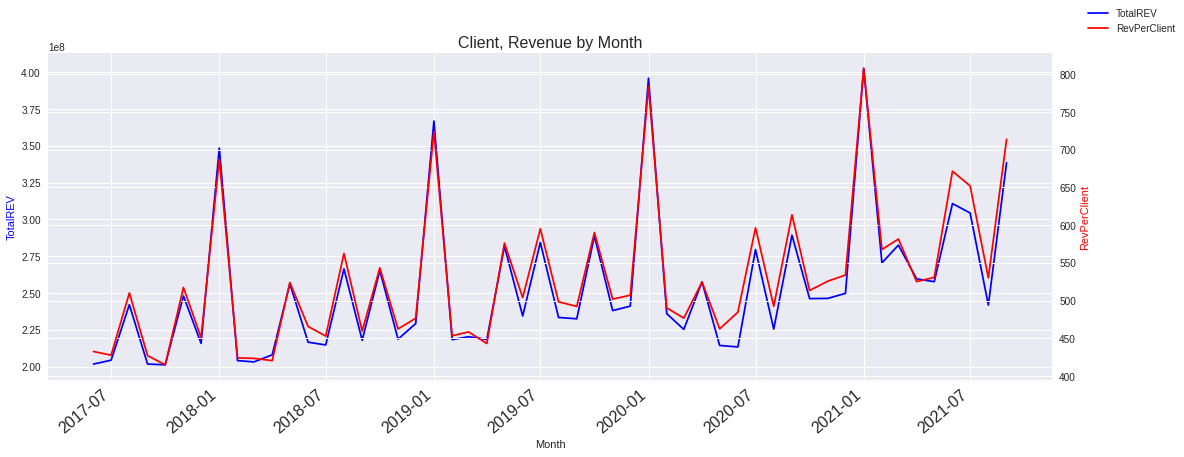

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))

ax1.set_title("Client, Revenue by Month", fontsize=16)
ax1.set_xlabel("Month")
ax1.set_ylabel("TotalREV", color='b')
ax1 = sns.lineplot(x="Month", y="TotalREV", data=client, color='b')
ax1.tick_params(axis="y")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right", fontsize=16)


ax2= ax1.twinx() # set up the 2nd axis

ax2.set_ylabel("RevPerClient", color='r')
ax2 = sns.lineplot(x="Month", y="RevPerClient", data=client, color='r')
ax2.tick_params(axis="y")

ax1.figure.legend(["TotalREV","RevPerClient"])
plt.show()

Cient by industry by month

In [ ]:
pd.DataFrame(px_total[px_total['TOTALREV'].notnull()].groupby(['BUSTYPELEVEL1', 'Month']).agg(count_distinct_customerID=('UNIQUESYSTEMCLIENTID', 'nunique')).reset_index())

,BUSTYPELEVEL1,Month,count_distinct_customerID
0,Accommodation and Food Services,2017-06-01,28304
1,Accommodation and Food Services,2017-07-01,28964
2,Accommodation and Food Services,2017-08-01,29015
3,Accommodation and Food Services,2017-09-01,28840
4,Accommodation and Food Services,2017-10-01,29675
...,...,...,...
1139,Wholesale Trade,2021-05-01,21010
1140,Wholesale Trade,2021-06-01,19955
1141,Wholesale Trade,2021-07-01,19971
1142,Wholesale Trade,2021-08-01,19417


In [ ]:
client2 = pd.DataFrame(px_total[px_total['TOTALREV'].notnull()].groupby(['BUSTYPELEVEL1', 'Month']).agg(count_distinct_customerID=('UNIQUESYSTEMCLIENTID', 'nunique')))
client2 = client2.unstack(level=['BUSTYPELEVEL1'])
client2.columns = client2.columns.droplevel(0)
# client2.columns.name = 'Client_count' 
client2

BUSTYPELEVEL1,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,Educational Services,Finance and Insurance,Health Care and Social Assistance,Information,Management of Companies and Enterprises,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction",Not Specified,Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Public Administration,Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Unclassified,Utilities,Wholesale Trade
Month,,,,,,,,,,,,,,,,,,,,,,
2017-06-01,28304,34610,3353,9996,41126,7485,22545,62206,9019,1813,23505,816,15,50626,76490,2499,20807,37268,9493,1650,818,21694
2017-07-01,28964,35647,3497,10382,42126,7747,23090,63345,9384,1857,23854,835,16,51972,78517,2578,21413,38030,9764,1715,836,22069
2017-08-01,29015,35247,3459,10224,42125,7650,22796,63201,9208,1818,23763,832,15,51822,77280,2559,21093,37973,9781,1687,823,21952
2017-09-01,28840,35193,3449,10118,42095,7620,22798,62723,9185,1873,23766,836,15,51393,76907,2541,21033,37725,9768,1653,820,21821
2017-10-01,29675,36343,3547,10545,43121,7884,23342,64127,9562,1912,24146,856,15,52919,79068,2590,21672,38553,10046,1750,843,22225
2017-11-01,29364,35872,3469,10266,42797,7772,23051,63628,9355,1844,24023,855,12,52376,77808,2551,21307,38137,9998,1702,836,22100
2017-12-01,28948,36022,3425,10287,42471,7721,23210,63487,9501,1857,24042,843,13,52038,78178,2532,21476,37836,9933,1696,830,22040
2018-01-01,31158,38348,3745,11120,45165,8248,24591,66289,10150,2117,25054,898,14,55799,82339,2674,22868,40172,10582,1856,887,22931
2018-02-01,29453,36070,3407,10272,42835,7819,23216,63964,9472,1866,24179,843,12,52839,77542,2520,21576,38191,10138,1660,853,22201


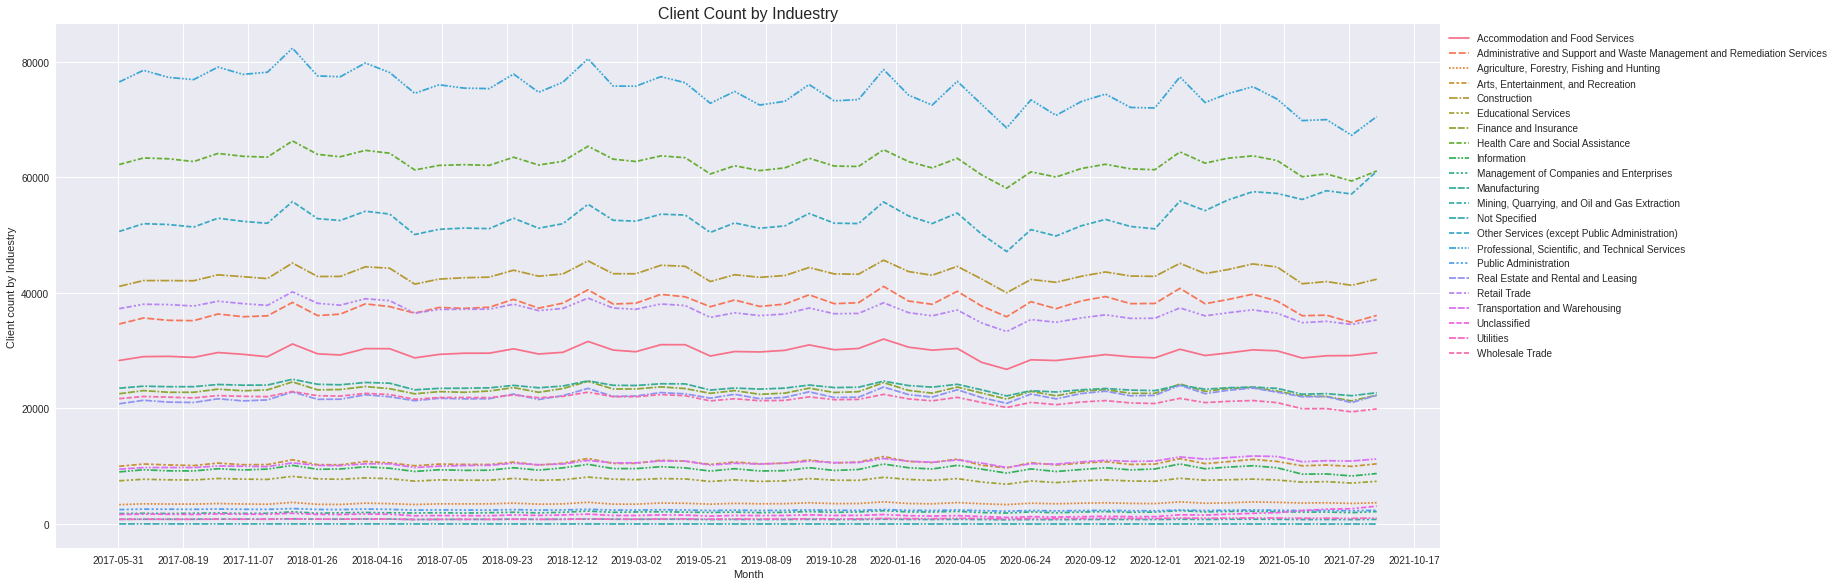

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.lineplot(data=client2)
plt.tight_layout()
plt.legend(loc = 2, bbox_to_anchor = (1,1)) # set legend apart from curve
ax.xaxis.set_major_locator(plt.MaxNLocator(24)) #reduce Xaxis values
ax.set_title("Client Count by Induestry", fontsize=16)
ax.set_xlabel("Month")
ax.set_ylabel("Client count by Induestry")

plt.show()

SARIMA

In [ ]:
temp3 = px_total.groupby(['Month']).TOTALREV.sum()
temp3 = pd.DataFrame(temp3)
temp3.index=pd.to_datetime(temp3.index)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(temp3['TOTALREV'], model='additive') # the variance over the periods is almost same, so choose additive


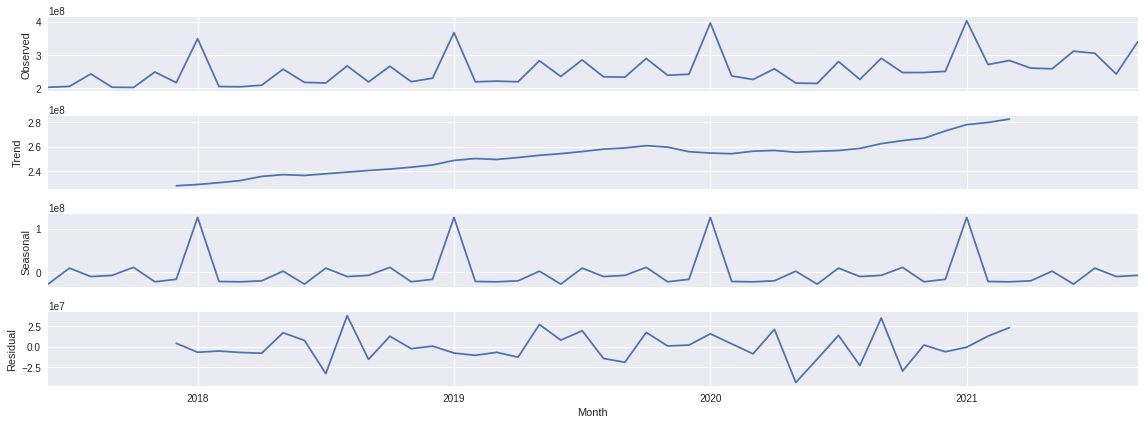

In [ ]:
plt.rc("figure", figsize=(16,6))
result.plot()
plt.show()

In [ ]:
!pip install statsmodels --upgrade

In [ ]:
import statsmodels.api as sm

# from statsmodels.tsa.ar_model import ar_select_order, AutoReg
from itertools import product
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Augmented Dickey-Fuller test
ad_fuller_result = adfuller(temp3.dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

NameError: ignored

In [ ]:
# Augmented Dickey-Fuller test
ad_fuller_result = adfuller(temp3.diff(periods=1).dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.5243584611801655
p-value: 1.023394885771802e-08


In [ ]:
# compute SMA 12
temp3['SMA_12'] = temp3['TOTALREV'].rolling(12).mean()

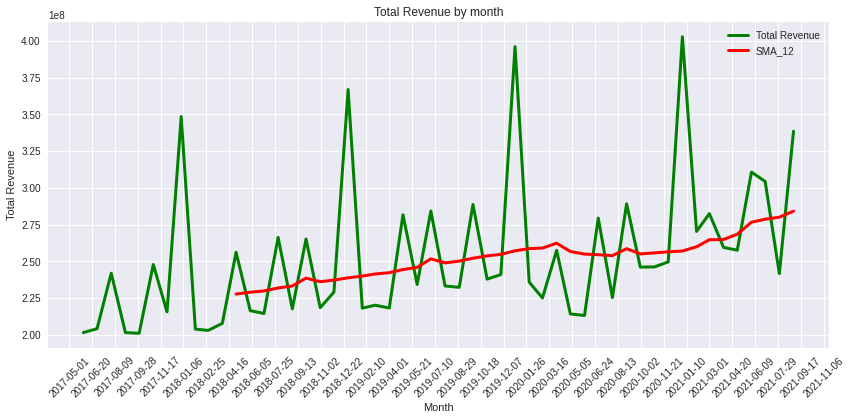

In [ ]:
# plot simple moving average
fig, ax1 = plt.subplots(figsize=(14, 6))
sns.lineplot(x="Month", y="TOTALREV", data=temp3, linewidth=3, color='green' )

ax1.set_title("Total Revenue by month")
ax1.set_xlabel("Month")
ax1.set_ylabel("Total Revenue")

sns.lineplot(x="Month", y="SMA_12", data=temp3, linewidth=3, color='red')

ax1.legend(['Total Revenue', 'SMA_12']);
ax1.xaxis.set_major_locator(plt.MaxNLocator(36))
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.show()

In [ ]:
temp3= temp3.drop(columns='SMA_12', axis=1)

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
# plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from itertools import product
from tqdm import tqdm_notebook


In [ ]:
# Define search range while keep d=D=1 constant
p = range(0, 3, 1)
d = range(0, 3, 1)
q = range(0, 3, 1)
P = range(0, 3, 1)
D = range(0, 3, 1)
Q = range(0, 3, 1)
s = 12
parameters = product(p, d, q, P, D, Q)
parameters_list = list(parameters)
print(len(parameters_list))

729


In [ ]:
def optimize_SARIMA(parameters_list, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = sm.tsa.statespace.SARIMAX(exog, order=(param[0], param[1], param[2]), seasonal_order=(param[3], param[4], param[5], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,d, q)x(P,D,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
result_df = optimize_SARIMA(parameters_list, 12, temp3) # use first 6 years for training
result_df

  0%|          | 0/729 [00:00<?, ?it/s]

,"(p,d, q)x(P,D,Q)",AIC
0,"(2, 2, 2, 0, 2, 0)",1007.400621
1,"(2, 2, 2, 1, 2, 0)",1008.168479
2,"(1, 2, 2, 1, 2, 0)",1008.254770
3,"(2, 2, 2, 2, 2, 0)",1008.595297
4,"(0, 2, 2, 1, 2, 0)",1008.775646
...,...,...
398,"(0, 0, 2, 2, 0, 1)",2132.672315
399,"(0, 0, 1, 2, 0, 1)",2133.120137
400,"(0, 0, 1, 0, 0, 0)",2136.566300
401,"(0, 0, 0, 0, 0, 1)",2149.014979


In [ ]:
model = sm.tsa.statespace.SARIMAX(temp3,
                                order=(0, 1, 2),
                                seasonal_order=(0, 2, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                           TOTALREV   No. Observations:                   52
Model:             SARIMAX(0, 1, 2)x(0, 2, 0, 12)   Log Likelihood                -460.759
Date:                            Wed, 10 Nov 2021   AIC                            927.518
Time:                                    04:19:05   BIC                            931.052
Sample:                                06-01-2017   HQIC                           928.455
                                     - 09-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7342      0.221     -3.324      0.001      -1.167      -0.301
ma.L2          0.0748      0.190   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



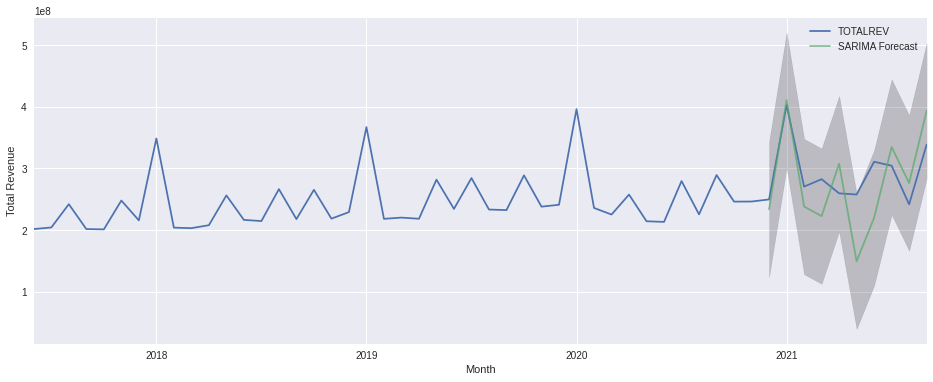

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = temp3.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='SARIMA Forecast', alpha=.7, figsize=(16, 6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue')
plt.legend()
plt.show()

In [ ]:
temp3['TOTALREV'][42:]

Month
2020-12-01    2.497092e+08
2021-01-01    4.027089e+08
2021-02-01    2.704338e+08
2021-03-01    2.825250e+08
2021-04-01    2.595503e+08
2021-05-01    2.576549e+08
2021-06-01    3.107403e+08
2021-07-01    3.043623e+08
2021-08-01    2.417372e+08
2021-09-01    3.385209e+08
Name: TOTALREV, dtype: float64

In [ ]:
forecast_accuracy(pred.predicted_mean, temp3['TOTALREV'][42:])

{'mae': 48241844.06205072,
 'mape': 0.1715388762636471,
 'me': -13164779.525467753,
 'mpe': -0.049872634345986114,
 'rmse': 56830232.42063506}

In [ ]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(temp3,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2122.5919903812674
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1604.617025882006
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1469.0490277589747
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2790.502416590018
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1043.1288272188717
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1497.3094423307625
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1463.6713844217584
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1060.3383067342584
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2780.892485081996
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:611.9280987785039
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:1055.3903049383846
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:1058.352812422976
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:610.2831660772722
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:1710.945910677904
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:157.80674677556163
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2054.0645303883616
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1554.9736611262201
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1431.9746917035075

ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:310.4893406415513

In [ ]:
mod = sm.tsa.statespace.SARIMAX(temp3,
                                order=(0, 1, 2),
                                seasonal_order=(0, 2, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7342      0.221     -3.324      0.001      -1.167      -0.301
ma.L2          0.0748      0.190      0.394      0.694      -0.297       0.447
sigma2       3.13e+15   7.22e-18   4.33e+32      0.000    3.13e+15    3.13e+15


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



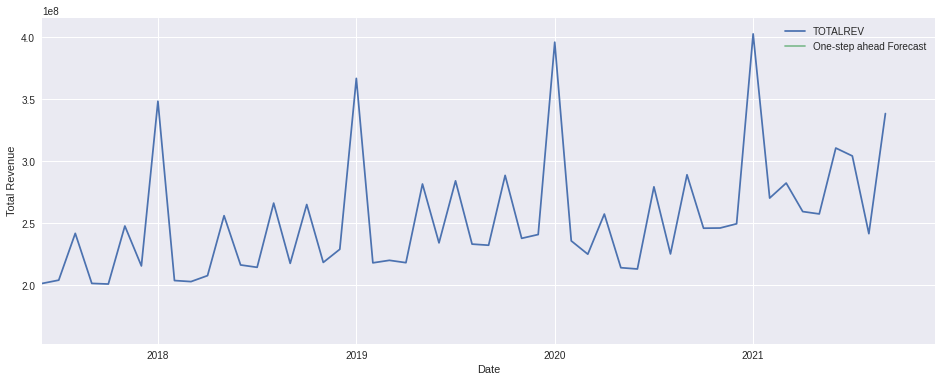

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2021-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = temp3.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(16, 6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Revenue')
plt.legend()
plt.show()

fbprophet

In [ ]:
pip install fbprophet

In [ ]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [ ]:
df = px_total.groupby(['Month']).TOTALREV.sum().reset_index()
df = pd.DataFrame(df)
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2017-06-01,2.016585e+08
1,2017-07-01,2.042975e+08
2,2017-08-01,2.420025e+08
3,2017-09-01,2.016670e+08
4,2017-10-01,2.011620e+08


In [ ]:
train_df = df[:46]
test_df = df[46:]

In [ ]:
m = Prophet()
m.fit(train_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=24)
forecast = m.predict(test_df)

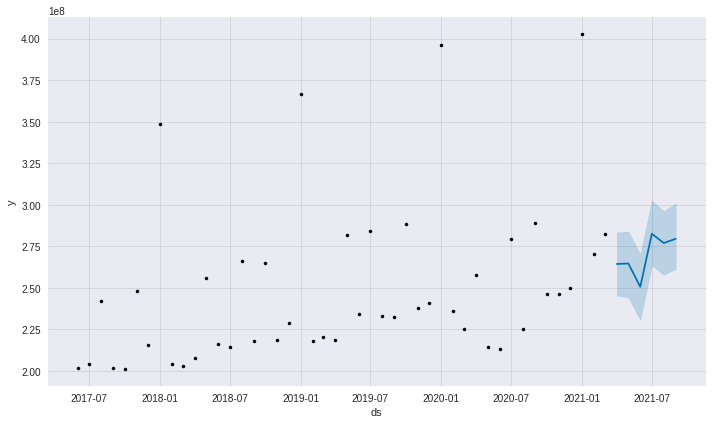

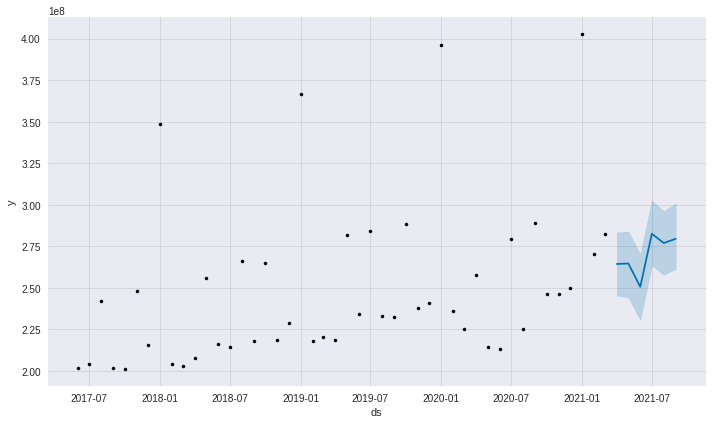

In [ ]:
m.plot(forecast)


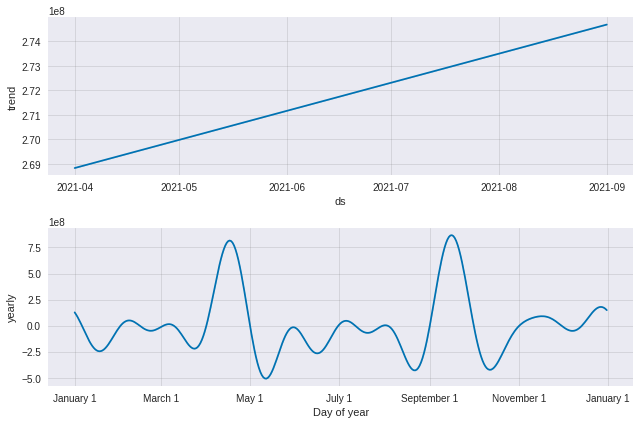

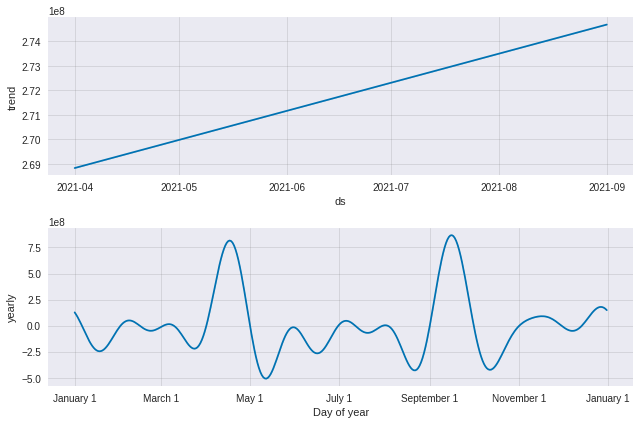

In [ ]:
m.plot_components(forecast)

In [ ]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [ ]:
cmp_df = make_comparison_dataframe(test_df, forecast)
cmp_df

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2021-04-01,2.644146e+08,2.453423e+08,2.833477e+08,2.595503e+08
2021-05-01,2.646862e+08,2.442825e+08,2.840295e+08,2.576549e+08
2021-06-01,2.506779e+08,2.305797e+08,2.703296e+08,3.107403e+08
2021-07-01,2.826010e+08,2.634905e+08,3.026448e+08,3.043623e+08
2021-08-01,2.769762e+08,2.578044e+08,2.962772e+08,2.417372e+08
2021-09-01,2.795653e+08,2.613673e+08,3.007795e+08,3.385209e+08


In [ ]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [ ]:
for err_name, err_value in calculate_forecast_errors(cmp_df, 6).items():
    print(err_name, err_value)

MAPE 10.512443758055104
MAE 31318943.619068343


In [ ]:
result = temp3.join(cmp_df)
result = result.drop(columns='y', axis=1)

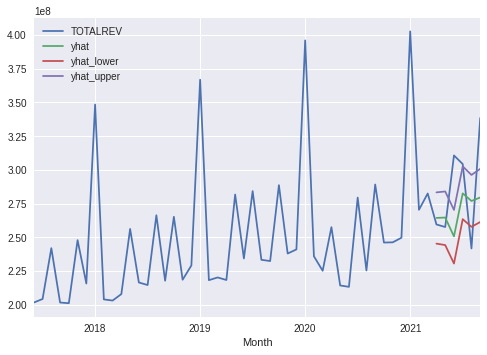

In [ ]:
result.plot()

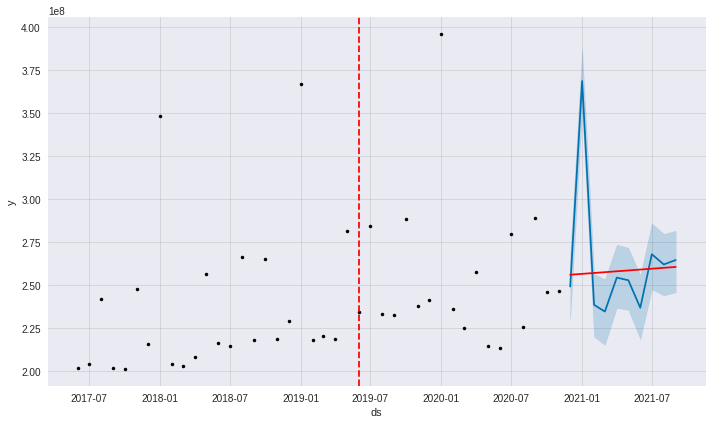

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=300)
forecast = m.predict(future)

In [ ]:
forecast.tail(10)

NameError: ignored

In [ ]:
m.changepoints

1    2017-07-01
3    2017-09-01
4    2017-10-01
5    2017-11-01
6    2017-12-01
8    2018-02-01
9    2018-03-01
10   2018-04-01
12   2018-06-01
13   2018-07-01
14   2018-08-01
15   2018-09-01
17   2018-11-01
18   2018-12-01
19   2019-01-01
20   2019-02-01
22   2019-04-01
23   2019-05-01
24   2019-06-01
26   2019-08-01
27   2019-09-01
28   2019-10-01
29   2019-11-01
31   2020-01-01
32   2020-02-01
Name: ds, dtype: datetime64[ns]

In [ ]:
temp4 = pd.read_excel('/content/drive/MyDrive/Paycheck Project/All_industry_with_last_6months_Complete.xlsx')

In [ ]:
temp4.columns = ['ds', 'y', 'Job openings rate', 'Hiring rate',
       'Total seperations rate', 'Unemployment rate', 'Inflation rate']

In [ ]:
temp4.columns

Index(['ds', 'y', 'Job openings rate', 'Hiring rate', 'Total seperations rate',
       'Unemployment rate', 'Inflation rate'],
      dtype='object')

In [ ]:
temp4.tail(3)

,ds,y,Job openings rate,Hiring rate,Total seperations rate,Unemployment rate,Inflation rate
50,2021-08-01,2.417372e+08,0.066,0.043,0.041,0.052,5.3
51,2021-09-01,3.385209e+08,NaN,NaN,NaN,0.048,5.4
52,2021-10-01,NaN,NaN,NaN,NaN,0.046,6.2


In [ ]:
temp4 = temp4.drop(index=[51, 52])

In [ ]:
train_X= temp4[:42]
test_X= temp4[42:]

In [ ]:
# add holydays/peak days
peak_season = pd.DataFrame({
  'holiday': 'peak_season',
  'ds': pd.to_datetime(['2017-08-01', '2017-11-01',
                        '2018-01-01', '2018-05-01',
                        '2018-08-01', '2018-10-01',
                        '2019-01-01', '2019-05-01', 
                        '2019-07-01', '2019-10-01',
                        '2020-01-01', '2019-07-01',
                        '2020-09-01', '2021-01-01',
                        '2021-03-01', '2021-06-01',
                        '2021-07-01', '2021-09-01']),
  'lower_window': 0,
  'upper_window': 0,
})

In [ ]:
# add holydays/peak days
peak_season = pd.DataFrame({
  'holiday': 'peak_season',
  'ds': pd.to_datetime(['2017-08-01', '2017-11-01',
                        '2018-01-01', '2018-05-01',
                        '2018-08-01', '2018-10-01',
                        '2019-01-01', '2019-05-01', 
                        '2019-07-01', '2019-10-01',
                        '2020-01-01', '2019-07-01',
                        '2020-09-01', '2021-01-01']),
  'lower_window': 0,
  'upper_window': 0,
})

In [ ]:
#Additional Regressor
pro_regressor= Prophet(holidays=peak_season)
pro_regressor.add_regressor('Job openings rate')
pro_regressor.add_regressor('Hiring rate')
pro_regressor.add_regressor('Total seperations rate')
pro_regressor.add_regressor('Unemployment rate')
pro_regressor.add_regressor('Inflation rate')
#Fitting the data
pro_regressor.fit(train_X)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = pro_regressor.make_future_dataframe(periods=24)
forecast = pro_regressor.predict(test_X)

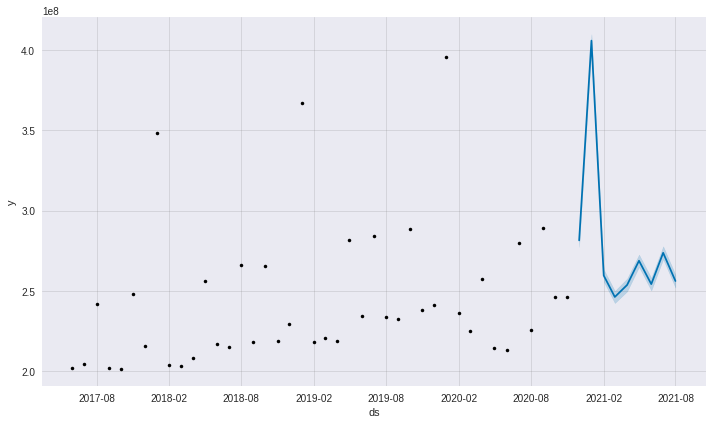

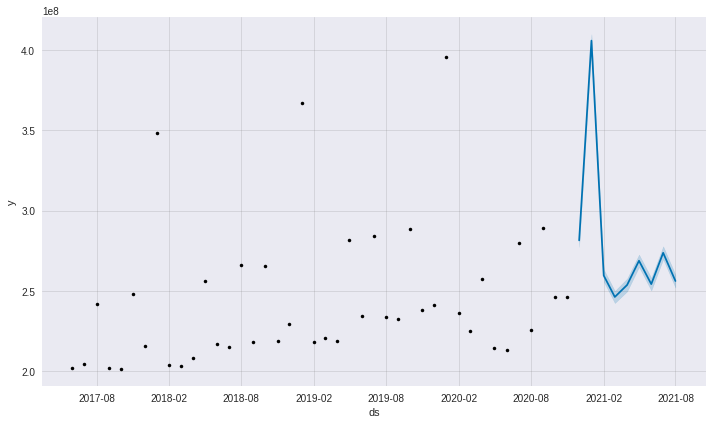

In [ ]:
pro_regressor.plot(forecast)


In [ ]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [ ]:
cmp_df = make_comparison_dataframe(test_X, forecast)
cmp_df

,yhat,yhat_lower,yhat_upper,y,Job openings rate,Hiring rate,Total seperations rate,Unemployment rate,Inflation rate
ds,,,,,,,,,
2020-12-01,2.814257e+08,2.773477e+08,2.851636e+08,2.497092e+08,0.045,0.038,0.039,0.067,1.4
2021-01-01,4.060211e+08,4.019192e+08,4.100556e+08,4.027089e+08,0.047,0.038,0.037,0.063,1.4
2021-02-01,2.594929e+08,2.556661e+08,2.632641e+08,2.704338e+08,0.050,0.040,0.038,0.062,1.7
2021-03-01,2.461327e+08,2.423268e+08,2.499076e+08,2.825250e+08,0.054,0.042,0.038,0.060,2.6
2021-04-01,2.536130e+08,2.496305e+08,2.576169e+08,2.595503e+08,0.060,0.042,0.040,0.061,4.2
2021-05-01,2.687215e+08,2.648388e+08,2.725743e+08,2.576549e+08,0.061,0.042,0.037,0.058,5.0
2021-06-01,2.541467e+08,2.501410e+08,2.580439e+08,3.107403e+08,0.065,0.047,0.038,0.059,5.4
2021-07-01,2.736587e+08,2.696991e+08,2.777419e+08,3.043623e+08,0.070,0.046,0.039,0.054,5.4
2021-08-01,2.560857e+08,2.519193e+08,2.599984e+08,2.417372e+08,0.066,0.043,0.041,0.052,5.3


In [ ]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [ ]:
for err_name, err_value in calculate_forecast_errors(cmp_df, 8).items():
    print(err_name, err_value)

MAPE 7.320972582165608
MAE 21161850.92710128


In [ ]:
cmp_df.columns

Index(['yhat', 'yhat_lower', 'yhat_upper', 'y', 'Job openings rate',
       'Hiring rate', 'Total seperations rate', 'Unemployment rate',
       'Inflation rate'],
      dtype='object')

In [ ]:
pred = cmp_df[['yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
temp4.index = pd.to_datetime(temp4.ds)
result = temp4.join(pred)

In [ ]:
result.columns

Index(['ds', 'y', 'Job openings rate', 'Hiring rate', 'Total seperations rate',
       'Unemployment rate', 'Inflation rate', 'yhat', 'yhat_lower',
       'yhat_upper'],
      dtype='object')

In [ ]:
result = result.drop(columns=['Job openings rate', 'Hiring rate', 'Total seperations rate','Unemployment rate', 'Inflation rate'])

In [ ]:
result = result.drop(columns=['ds'])

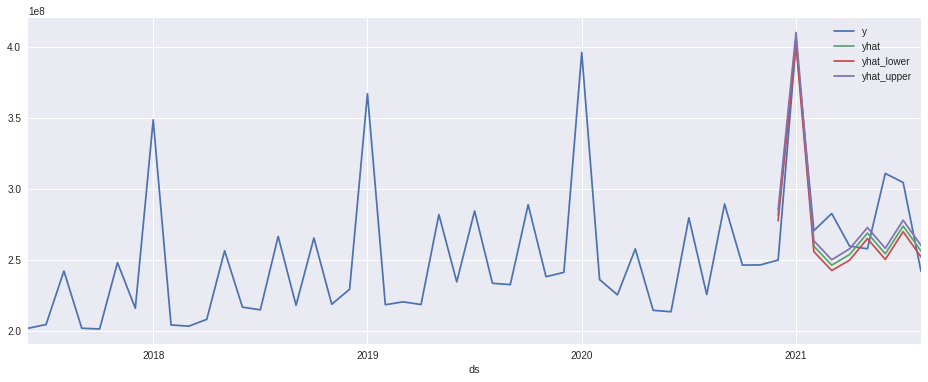

In [ ]:
result.plot(figsize=(16,6))


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(result['yhat'][42:], result['y'][42:])

{'mae': 13330740.148487767,
 'mape': 0.049449751189122634,
 'me': 8816352.006561717,
 'mpe': 0.03291832279666349,
 'rmse': 15976486.845208867}

In [ ]:
result.columns

Index(['y', 'yhat', 'yhat_lower', 'yhat_upper'], dtype='object')

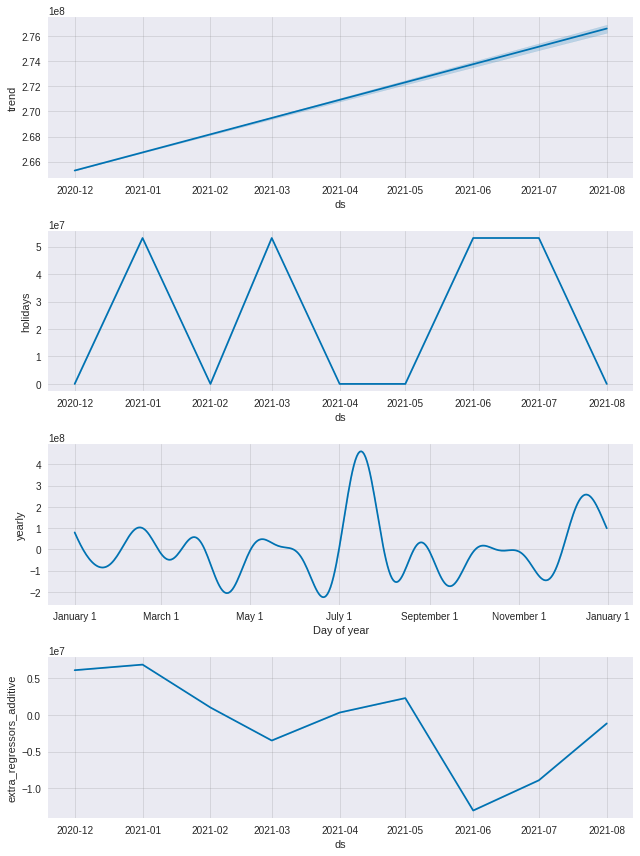

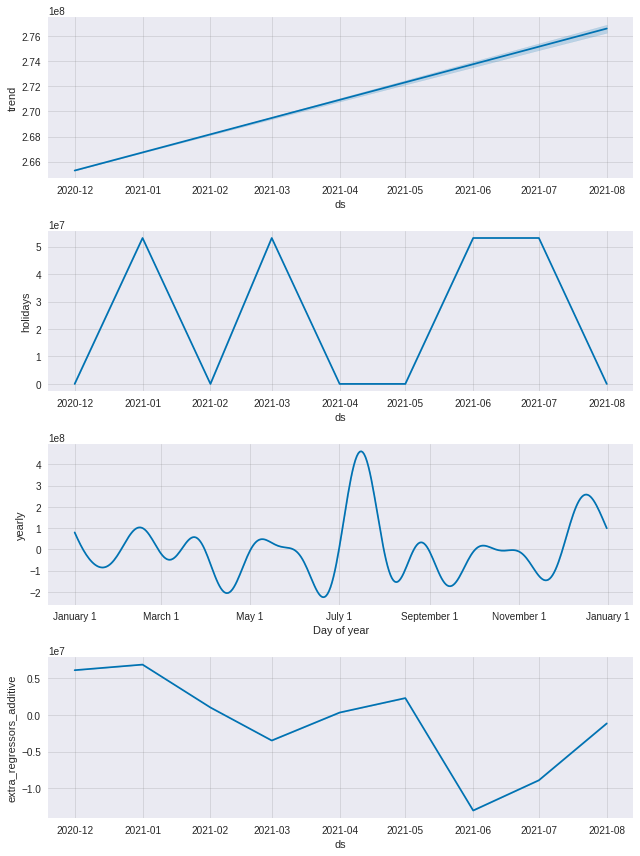

In [ ]:
pro_regressor.plot_components(forecast)

Hybrid method

In [ ]:
temp5 = pd.read_excel('/content/drive/MyDrive/Paycheck Project/All_industry_with_last_6months_Complete.xlsx')

In [ ]:
temp5.columns = ['ds', 'y', 'Job openings rate', 'Hiring rate',
       'Total seperations rate', 'Unemployment rate', 'Inflation rate']

In [ ]:
temp5.columns

Index(['ds', 'y', 'Job openings rate', 'Hiring rate', 'Total seperations rate',
       'Unemployment rate', 'Inflation rate'],
      dtype='object')

In [ ]:
temp5.tail(3)

,ds,y,Job openings rate,Hiring rate,Total seperations rate,Unemployment rate,Inflation rate
50,2021-08-01,2.417372e+08,0.066,0.043,0.041,0.052,5.3
51,2021-09-01,3.385209e+08,NaN,NaN,NaN,0.048,5.4
52,2021-10-01,NaN,NaN,NaN,NaN,0.046,6.2


In [ ]:
temp5 = temp5.drop(index=[51, 52])
temp5.index = pd.to_datetime(temp5.ds)
temp5 = temp5.drop(columns='ds', axis=1)

In [ ]:
X_train = temp5[:42].drop(columns='y', axis=1)
y_train = pd.DataFrame(temp5['y'][:42])
X_test = temp5[42:].drop(columns='y', axis=1)
y_test = pd.DataFrame(temp5['y'][42:])

In [ ]:
mod = sm.tsa.statespace.SARIMAX(temp5['y'],
                                order=(0, 1, 2),
                                seasonal_order=(0, 2, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [ ]:
results = pd.DataFrame(results.predict())
results.columns = ['y']

In [ ]:
results.index.name = 'ds'

In [ ]:
from xgboost import XGBRegressor
y_fit = results[:42]
y_pred = results[42:]
y_resid = y_train - y_fit
# Train XGBoost on the residuals
xgb = XGBRegressor()
xgb.fit(X_train, y_resid)

# Add the predicted residuals onto the predicted trends
y_fit_boosted = xgb.predict(X_train) + y_fit['y']
y_pred_boosted = xgb.predict(X_test) + y_pred['y']

[15:00:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_fit_boosted = pd.DataFrame(y_fit_boosted)
y_pred_boosted = pd.DataFrame(y_pred_boosted)

In [ ]:
result2 = temp5['y']
result2 = pd.DataFrame(result2)

In [ ]:
y_fit_boosted.columns = ['y_fit']

In [ ]:
y_pred_boosted.columns = ['y_pred']

In [ ]:
result2 = result2.join(y_fit_boosted)

In [ ]:
result2 = result2.join(y_pred_boosted)

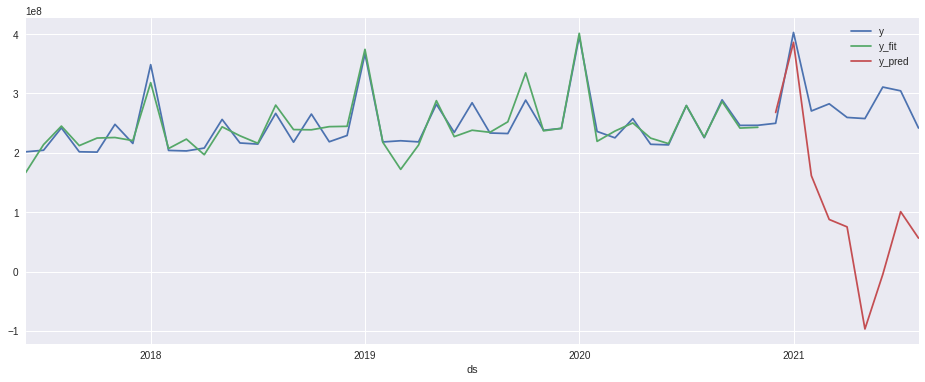

In [ ]:
result2.plot(figsize=(16,6))

In [ ]:
forecast_accuracy(results['y'][42:], temp5['y'][42:])

{'mae': 47371926.5198324,
 'mape': 0.17218041894177183,
 'me': -21237218.550188944,
 'mpe': -0.07392511139615195,
 'rmse': 57283929.58133046}